In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import seaborn as sns


df = pd.read_csv('pilot5_nonresp_inc_test_diff_stats.csv')

In [2]:
df = df.reset_index(drop=True)


In [3]:
print(df["participant"].isnull().sum())
df = df.dropna(subset=["participant"])  # Drop rows with missing participants

df["participant"] = df["participant"].astype(str)  # Convert to string, if necessary
df = df.reset_index(drop=True)
print(df.duplicated().sum())  # Check for duplicates


0
0


In [4]:
df = df.reset_index(drop=True)


In [5]:
print(df.duplicated(subset=["participant"]).sum())  # Check for duplicates in the group column


40366


In [6]:
df = df.drop_duplicates(subset=["participant"])


In [7]:
print(df.duplicated(subset=["participant"]).sum())  # Check for duplicates in the group column


0


In [8]:
# df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - df['it_sim_dis_diff'].mean()
# df['v2_sim_dis_diff'] = df['v2_sim_dis_diff'] - df['v2_sim_dis_diff'].mean()


In [9]:
# df['it_sim_dis_diff_sq'] = df['it_sim_dis_diff'] ** 2
# df['v2_sim_dis_diff_sq'] = df['v2_sim_dis_diff'] ** 2


In [10]:
# df['validity'] = pd.Categorical(df['validity'])
# df['validity'] = df['validity'].cat.codes - df['validity'].cat.codes.mean()


In [11]:
# df['reliability'] = pd.Categorical(df['reliability'])
# df['reliability'] = df['reliability'].cat.codes - df['reliability'].cat.codes.mean()


In [12]:
formula = """
resp_correct ~ (it_sim_dis_diff_test_z + it_sim_dis_diff_test_sq_z) * reliability_binary_z *  
                  validity_binary_z + (v2_sim_dis_diff_test_z + v2_sim_dis_diff_test_sq_z) * reliability_binary_z *  
                  validity_binary_z + it_sim_dis_diff_test_z * v2_sim_dis_diff_test_z
    """



md = smf.mixedlm(formula, df, groups=df["participant"]).fit()
md.summary()

/Users/lana/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Mixed Linear Model Regression Results
===========================================================================================================
Model:                             MixedLM                 Dependent Variable:                 resp_correct
No. Observations:                  134                     Method:                             REML        
No. Groups:                        134                     Scale:                              0.0816      
Min. group size:                   1                       Log-Likelihood:                     -107.5566   
Max. group size:                   1                       Converged:                          Yes         
Mean group size:                   1.0                                                                     
-----------------------------------------------------------------------------------------------------------
                                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                                         0.786    0.039 20.325 0.000  0.710  0.862
it_sim_dis_diff_test_z                                            0.031    0.042  0.748 0.455 -0.051  0.114
it_sim_dis_diff_test_sq_z                                         0.013    0.038  0.341 0.733 -0.062  0.088
reliability_binary_z                                             -0.014    0.039 -0.358 0.720 -0.089  0.062
it_sim_dis_diff_test_z:reliability_binary_z                       0.010    0.041  0.256 0.798 -0.070  0.090
it_sim_dis_diff_test_sq_z:reliability_binary_z                    0.018    0.035  0.515 0.606 -0.051  0.087
validity_binary_z                                                 0.068    0.042  1.631 0.103 -0.014  0.149
it_sim_dis_diff_test_z:validity_binary_z                         -0.069    0.050 -1.380 0.168 -0.166  0.029
it_sim_dis_diff_test_sq_z:validity_binary_z                      -0.068    0.038 -1.758 0.079 -0.143  0.008
reliability_binary_z:validity_binary_z                            0.055    0.041  1.355 0.175 -0.025  0.135
it_sim_dis_diff_test_z:reliability_binary_z:validity_binary_z    -0.047    0.049 -0.966 0.334 -0.143  0.049
it_sim_dis_diff_test_sq_z:reliability_binary_z:validity_binary_z  0.016    0.038  0.416 0.677 -0.059  0.091
v2_sim_dis_diff_test_z                                            0.037    0.040  0.929 0.353 -0.041  0.116
v2_sim_dis_diff_test_sq_z                                        -0.032    0.039 -0.820 0.412 -0.107  0.044
v2_sim_dis_diff_test_z:reliability_binary_z                       0.032    0.041  0.799 0.424 -0.047  0.112
v2_sim_dis_diff_test_sq_z:reliability_binary_z                   -0.036    0.037 -0.958 0.338 -0.109  0.037
v2_sim_dis_diff_test_z:validity_binary_z                         -0.007    0.046 -0.150 0.881 -0.097  0.083
v2_sim_dis_diff_test_sq_z:validity_binary_z                       0.026    0.038  0.673 0.501 -0.049  0.101
v2_sim_dis_diff_test_z:reliability_binary_z:validity_binary_z     0.086    0.045  1.941 0.052 -0.001  0.174
v2_sim_dis_diff_test_sq_z:reliability_binary_z:validity_binary_z  0.055    0.038  1.438 0.151 -0.020  0.130
it_sim_dis_diff_test_z:v2_sim_dis_diff_test_z                    -0.007    0.036 -0.187 0.852 -0.078  0.065
Group Var                                                         0.082                                    
===========================================================================================================

"""

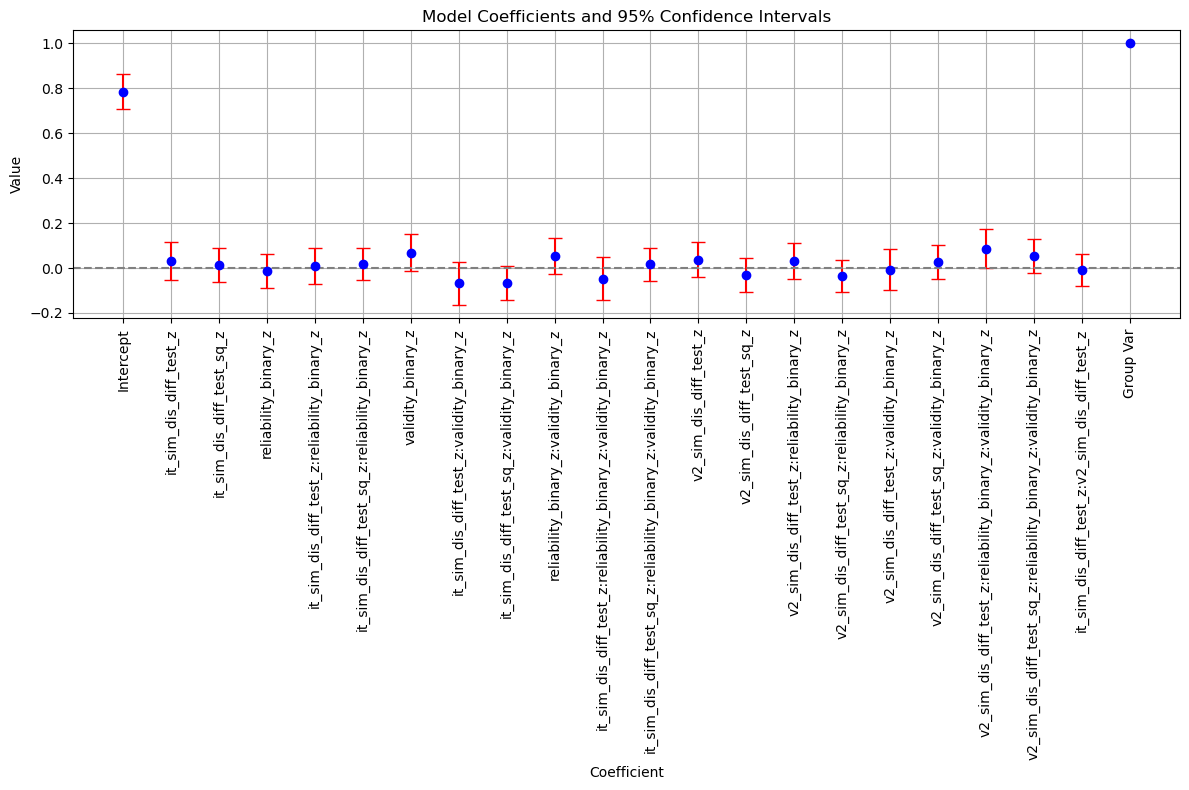

In [13]:
# Extract coefficients and their confidence intervals
coefs = md.params
conf = md.conf_int()
conf['coef'] = coefs

# Plotting the coefficients and their confidence intervals
plt.figure(figsize=(12, 8))
plt.errorbar(conf.index, conf['coef'], yerr=(conf[1] - conf['coef'], conf['coef'] - conf[0]), fmt='o', color='b', ecolor='r', capsize=5)
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.title('Model Coefficients and 95% Confidence Intervals')
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

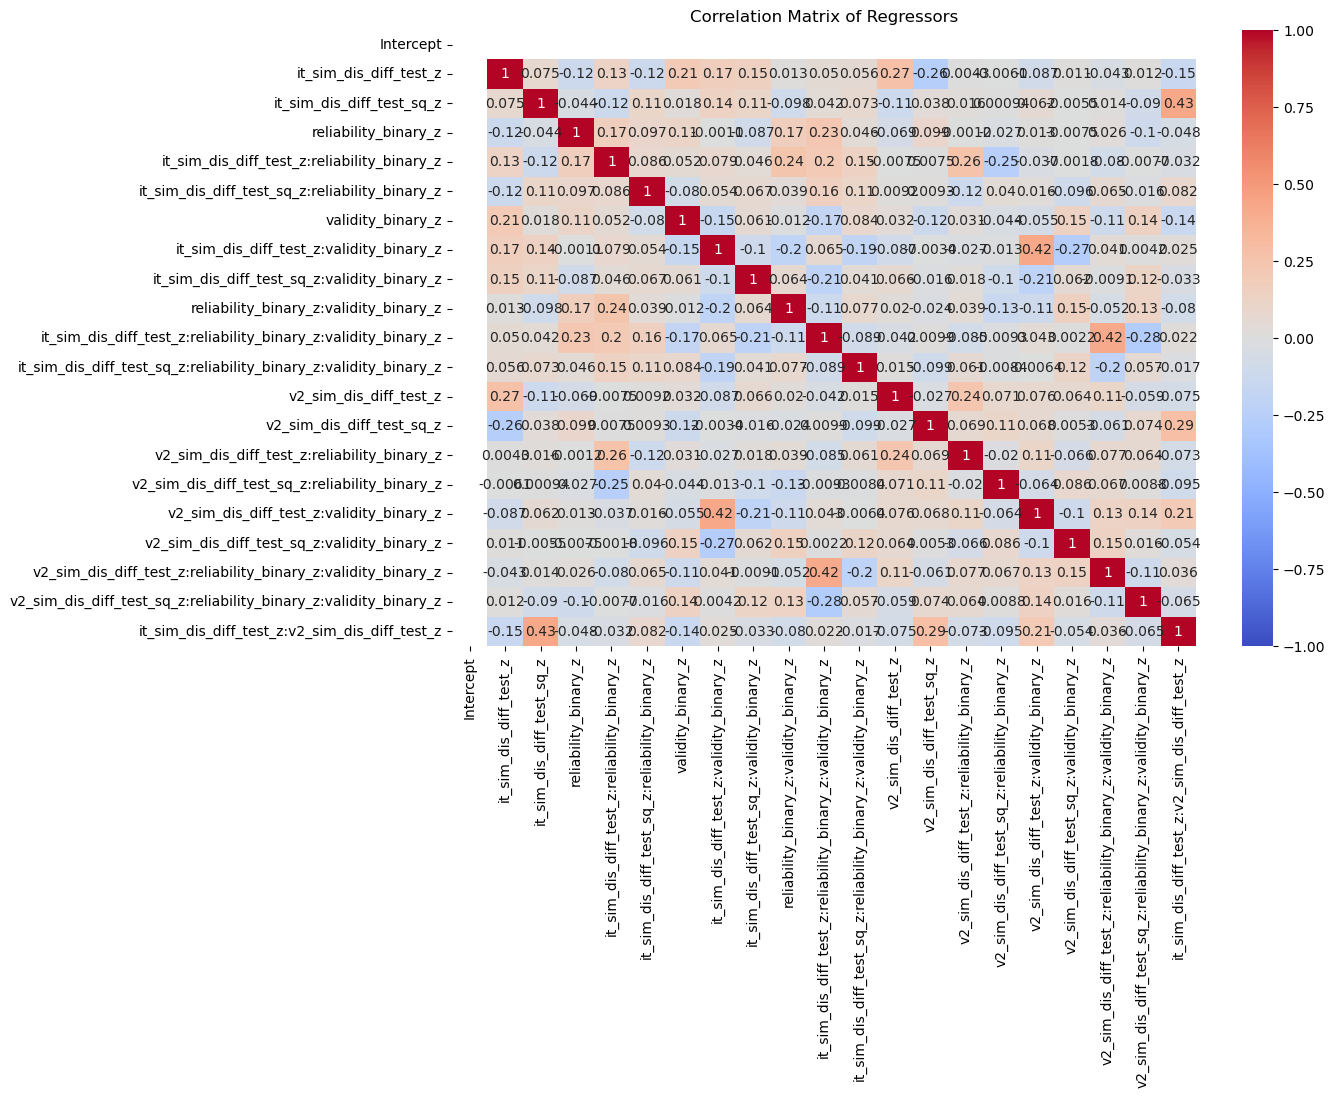

,Intercept,it_sim_dis_diff_test_z,it_sim_dis_diff_test_sq_z,reliability_binary_z,it_sim_dis_diff_test_z:reliability_binary_z,it_sim_dis_diff_test_sq_z:reliability_binary_z,validity_binary_z,it_sim_dis_diff_test_z:validity_binary_z,it_sim_dis_diff_test_sq_z:validity_binary_z,reliability_binary_z:validity_binary_z,...,it_sim_dis_diff_test_sq_z:reliability_binary_z:validity_binary_z,v2_sim_dis_diff_test_z,v2_sim_dis_diff_test_sq_z,v2_sim_dis_diff_test_z:reliability_binary_z,v2_sim_dis_diff_test_sq_z:reliability_binary_z,v2_sim_dis_diff_test_z:validity_binary_z,v2_sim_dis_diff_test_sq_z:validity_binary_z,v2_sim_dis_diff_test_z:reliability_binary_z:validity_binary_z,v2_sim_dis_diff_test_sq_z:reliability_binary_z:validity_binary_z,it_sim_dis_diff_test_z:v2_sim_dis_diff_test_z
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
it_sim_dis_diff_test_z,NaN,1.000000,0.075399,-0.122220,0.128798,-0.122380,0.205712,0.171703,0.148947,0.012781,...,0.056190,0.270774,-0.260447,0.004309,-0.006079,-0.086631,0.011039,-0.042566,0.012245,-0.148257
it_sim_dis_diff_test_sq_z,NaN,0.075399,1.000000,-0.044463,-0.117705,0.107947,0.018344,0.143714,0.107495,-0.097843,...,0.073427,-0.112099,0.038449,0.015998,0.000943,0.062482,-0.005460,0.014116,-0.090337,0.426857
reliability_binary_z,NaN,-0.122220,-0.044463,1.000000,0.169653,0.096953,0.109872,-0.001076,-0.086881,0.165139,...,0.045908,-0.068761,0.098728,-0.001154,-0.026693,0.012834,-0.007539,0.025648,-0.104544,-0.047608
it_sim_dis_diff_test_z:reliability_binary_z,NaN,0.128798,-0.117705,0.169653,1.000000,0.085661,0.051627,0.078829,0.046458,0.243932,...,0.145518,-0.007536,0.007516,0.260942,-0.252280,-0.036986,-0.001810,-0.080090,-0.007745,-0.031558
it_sim_dis_diff_test_sq_z:reliability_binary_z,NaN,-0.122380,0.107947,0.096953,0.085661,1.000000,-0.080212,0.053699,0.066558,0.038975,...,0.107979,0.009183,0.009330,-0.115111,0.040285,0.016448,-0.095881,0.065289,-0.015878,0.082056
validity_binary_z,NaN,0.205712,0.018344,0.109872,0.051627,-0.080212,1.000000,-0.153338,0.060538,-0.012403,...,0.084461,0.032265,-0.117985,0.031174,-0.044199,-0.055136,0.146327,-0.107333,0.143440,-0.140090
it_sim_dis_diff_test_z:validity_binary_z,NaN,0.171703,0.143714,-0.001076,0.078829,0.053699,-0.153338,1.000000,-0.102245,-0.201158,...,-0.192977,-0.087060,-0.003431,-0.027182,-0.012908,0.422119,-0.269071,0.040920,0.004155,0.025075
it_sim_dis_diff_test_sq_z:validity_binary_z,NaN,0.148947,0.107495,-0.086881,0.046458,0.066558,0.060538,-0.102245,1.000000,0.064242,...,0.041128,0.066460,-0.015708,0.018272,-0.101434,-0.206197,0.062368,-0.009147,0.124514,-0.032566
reliability_binary_z:validity_binary_z,NaN,0.012781,-0.097843,0.165139,0.243932,0.038975,-0.012403,-0.201158,0.064242,1.000000,...,0.077314,0.019631,-0.024459,0.039416,-0.132828,-0.107208,0.153328,-0.051860,0.127959,-0.080022


In [14]:
model_matrix = md.model.data.orig_exog

correlation_matrix_regressors = model_matrix.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_regressors, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Regressors')
plt.show()


# tools.display_dataframe_to_user(name="Correlation Matrix of Regressors", dataframe=correlation_matrix_regressors)

correlation_matrix_regressors

In [15]:
# model_matrix = md.model.data.orig_exog

# correlation_matrix_regressors = model_matrix.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix_regressors, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Regressors')
# plt.show()


# # tools.display_dataframe_to_user(name="Correlation Matrix of Regressors", dataframe=correlation_matrix_regressors)

# correlation_matrix_regressors


<!-- Those high correlations between regressors are causing problems

it looks like something is wrong with the reliability regressor


e.g., the reliability:validity interaction should not be so correlated with validity

replacing reliability with "C(reliability,Sum)". There is correlation between reliability and validity (because they depend on each other), and so adjusting the coding of reliability will help reduce colinearity


Another important step: make sure to subtract the mean of the IT and variables before computing the quadratic terms (ie, before squaring them). Otherwise, there will be very high correlation between the linear and quadratic terms -->

In [16]:
correlation_matrix_regressors.to_csv('correlation_matrix_regressors.csv')

file_path = 'correlation_matrix_regressors.csv'
file_path


'correlation_matrix_regressors.csv'

In [78]:
#get the model matrix from this dataframe
# md.model.data.

In [79]:
# #compute cross correlation of all regressors
# X.corr()

# sns.heatmap(X)